In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam,SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout


# Load data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


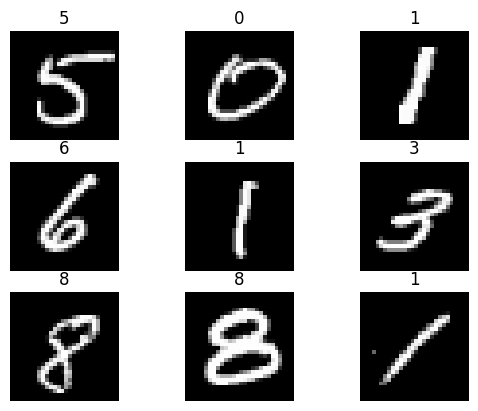

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


# Build ANN model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\ramys\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile and train

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


start_time = time.time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True, verbose=2)
train_time = (time.time() - start_time) / 10

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9237 - loss: 0.2632
Epoch 2/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9648 - loss: 0.1143
Epoch 3/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9755 - loss: 0.0786
Epoch 4/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9817 - loss: 0.0586
Epoch 5/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9855 - loss: 0.0441
Epoch 6/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9880 - loss: 0.0363
Epoch 7/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9902 - loss: 0.0295
Epoch 8/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9907 - loss: 0.0273
Epoch 9/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9935 - loss: 0.0194
Epoch 10/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9930 - loss: 0.0201


# Model info

In [ ]:
model.summary()
print("Final Accuracy:", test_acc)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Final Accuracy: 0.9746999740600586
First 5 epoch Accuracies: [0.9237499833106995, 0.9648333191871643, 0.9755416512489319, 0.9817083477973938, 0.9855416417121887]
Average training time per epoch: 3.7228722095489504


# Apply SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train_svm = X_train.reshape(-1, 28*28)
X_test_svm = X_test.reshape(-1, 28*28)


svm = SVC()
svm.fit(X_train_svm, y_train)

y_pred = svm.predict(X_test_svm)
acc_svm = accuracy_score(y_test, y_pred)
print("SVM Accuracy on full test set:", acc_svm)


SVM Accuracy on full test set: 0.9777


In [ ]:
#reshape x_traine to 28*28*1
X_train = X_train.reshape(len(X_train), 28,28,1)
#x_test
X_test = X_test.reshape(len(X_test), 28,28,1)
X_val = X_val.reshape(len(X_val), 28, 28, 1)
X_train[5].shape

(28, 28, 1)

In [ ]:
import random
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:

cnn_model1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.1)
cnn_model1.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8816 - loss: 0.3916 - val_accuracy: 0.9596 - val_loss: 0.1400
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9617 - loss: 0.1355 - val_accuracy: 0.9600 - val_loss: 0.1560
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9680 - loss: 0.1185 - val_accuracy: 0.9548 - val_loss: 0.1952
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9704 - loss: 0.1090 - val_accuracy: 0.9623 - val_loss: 0.1685
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9730 - loss: 0.1049 - val_accuracy: 0.9637 - val_loss: 0.1593
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9722 - loss: 0.1041 - val_accuracy: 0.9684 - val_loss: 0.1804
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9748 - loss: 0.1022 - val_accuracy: 0.9550 - val_loss: 0.1957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9718 -

In [ ]:
training_loss1,training_accu1=cnn_model1.evaluate(X_train, y_train)
valid_loss1,valid_accu1=cnn_model1.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu1}")
print(f"Training Loss: {training_loss1}")
print(f"validation Accuracy: {valid_accu1}")
print(f"Training Loss: {valid_loss1}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9750 - loss: 0.1136
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9614 - loss: 0.2353
Training Accuracy: 0.9743124842643738
Training Loss: 0.11451613157987595
validation Accuracy: 0.9616666436195374
Training Loss: 0.2345806062221527


In [ ]:

test_loss1,test_accu1 = cnn_model1.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9520 - loss: 0.2877


In [ ]:
print("Accuracy:", test_accu1)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9611999988555908
First 5 epoch Accuracies: [0.9313958287239075, 0.9650833606719971, 0.9694166779518127, 0.9706249833106995, 0.9732916951179504]
Average training time per epoch: 34.76194076538086


In [ ]:
cnn_model2 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model2.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [ ]:
start_time = time.time()
history = cnn_model2.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 20

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8723 - loss: 0.4081 - val_accuracy: 0.9578 - val_loss: 0.1484
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9629 - loss: 0.1312 - val_accuracy: 0.9583 - val_loss: 0.1609
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9659 - loss: 0.1209 - val_accuracy: 0.9639 - val_loss: 0.1329
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9694 - loss: 0.1071 - val_accuracy: 0.9695 - val_loss: 0.1293
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9764 - loss: 0.0819 - val_accuracy: 0.9669 - val_loss: 0.1345
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9784 - loss: 0.0766 - val_accuracy: 0.9668 - val_loss: 0.1629
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9804 - loss: 0.0765 - val_accuracy: 0.9616 - val_loss: 0.1755
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9785 -

In [ ]:
training_loss2,training_accu2=cnn_model2.evaluate(X_train, y_train)
valid_loss2,valid_accu2=cnn_model2.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu2}")
print(f"Training Loss: {training_loss2}")
print(f"validation Accuracy: {valid_accu2}")
print(f"validation Loss: {valid_loss2}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9147 - loss: 0.4563
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8993 - loss: 0.6227
Training Accuracy: 0.9146458506584167
Training Loss: 0.44856828451156616
validation Accuracy: 0.9003333449363708
Training Loss: 0.6428614854812622


In [ ]:
test_loss2,test_accu2 = cnn_model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9019 - loss: 0.6296


In [ ]:
print("Accuracy:", test_accu2)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9089999794960022
First 5 epoch Accuracies: [0.9296875, 0.9660208225250244, 0.9678958058357239, 0.9706041812896729, 0.9753333330154419]
Average training time per epoch: 33.09886348247528


In [ ]:
cnn_model3 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model3.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [ ]:
start_time = time.time()
history = cnn_model3.fit(X_train, y_train, epochs=15,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 15

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8760 - loss: 0.4174 - val_accuracy: 0.9575 - val_loss: 0.1489
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9648 - loss: 0.1243 - val_accuracy: 0.9578 - val_loss: 0.1847
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9694 - loss: 0.1113 - val_accuracy: 0.9658 - val_loss: 0.1544
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9739 - loss: 0.0958 - val_accuracy: 0.9678 - val_loss: 0.1462
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9778 - loss: 0.0885 - val_accuracy: 0.9558 - val_loss: 0.2160
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9767 - loss: 0.0958 - val_accuracy: 0.9732 - val_loss: 0.1521
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9714 - loss: 0.1251 - val_accuracy: 0.9651 - val_loss: 0.2224
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9757 -

In [ ]:
training_loss3,training_accu3=cnn_model3.evaluate(X_train, y_train)
valid_loss3,valid_accu3=cnn_model3.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu3}")
print(f"Training Loss: {training_loss3}")
print(f"validation Accuracy: {valid_accu3}")
print(f"validation Loss: {valid_loss3}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9696 - loss: 0.1434
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9561 - loss: 0.3072
Training Accuracy: 0.9693958163261414
Training Loss: 0.15200504660606384
validation Accuracy: 0.9574166536331177
validation Loss: 0.3038595914840698


In [ ]:
test_loss3,test_accu3 = cnn_model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9524 - loss: 0.3235


In [ ]:
print("Accuracy:", test_accu3)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9613000154495239
First 5 epoch Accuracies: [0.9315416812896729, 0.9686458110809326, 0.971916675567627, 0.9751874804496765, 0.9752291440963745]
Average training time per epoch: 34.68415454228719


In [ ]:

cnn_model4 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
cnn_model4.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8462 - loss: 0.5019 - val_accuracy: 0.9581 - val_loss: 0.1383
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9701 - loss: 0.1055 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9821 - loss: 0.0627 - val_accuracy: 0.9783 - val_loss: 0.0731
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9878 - loss: 0.0432 - val_accuracy: 0.9806 - val_loss: 0.0677
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9913 - loss: 0.0320 - val_accuracy: 0.9827 - val_loss: 0.0608
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9941 - loss: 0.0237 - val_accuracy: 0.9845 - val_loss: 0.0589
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9963 - loss: 0.0179 - val_accuracy: 0.9853 - val_loss: 0.0581
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9973 -

In [ ]:
training_loss4,training_accu4=cnn_model4.evaluate(X_train, y_train)
valid_loss4,valid_accu4=cnn_model4.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu4}")
print(f"Training Loss: {training_loss4}")
print(f"validation Accuracy: {valid_accu4}")
print(f"Training Loss: {valid_loss4}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9977 - loss: 0.0081
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0608
Training Accuracy: 0.9974583387374878
Training Loss: 0.008040092885494232
validation Accuracy: 0.9859166741371155
Training Loss: 0.06029472500085831


In [ ]:
test_loss4,test_accu4 = cnn_model4.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9821 - loss: 0.0620


In [ ]:
print("Accuracy:", test_accu4)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9854999780654907
First 5 epoch Accuracies: [0.9162291884422302, 0.9729583263397217, 0.9832083582878113, 0.989020824432373, 0.9919583201408386]
Average training time per epoch: 32.93019876480103


In [ ]:

cnn_model5 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.001)
cnn_model5.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model5.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7027 - loss: 1.0486 - val_accuracy: 0.9114 - val_loss: 0.2988
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9196 - loss: 0.2752 - val_accuracy: 0.9337 - val_loss: 0.2281
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9372 - loss: 0.2115 - val_accuracy: 0.9454 - val_loss: 0.1878
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9479 - loss: 0.1743 - val_accuracy: 0.9522 - val_loss: 0.1612
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9552 - loss: 0.1496 - val_accuracy: 0.9585 - val_loss: 0.1437
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9610 - loss: 0.1316 - val_accuracy: 0.9622 - val_loss: 0.1296
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9651 - loss: 0.1171 - val_accuracy: 0.9641 - val_loss: 0.1193
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9696 -

In [ ]:
training_loss5,training_accu5=cnn_model5.evaluate(X_train, y_train)
valid_loss5,valid_accu5=cnn_model5.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu5}")
print(f"Training Loss: {training_loss5}")
print(f"validation Accuracy: {valid_accu5}")
print(f"Training Loss: {valid_loss5}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9763 - loss: 0.0807
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9706 - loss: 0.0984
Training Accuracy: 0.976229190826416
Training Loss: 0.0799323096871376
validation Accuracy: 0.9700833559036255
Training Loss: 0.09912260621786118


In [ ]:
test_loss5,test_accu5 = cnn_model5.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.1044


In [ ]:
print("Accuracy:", test_accu5)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.97079998254776
First 5 epoch Accuracies: [0.8388749957084656, 0.9238749742507935, 0.9399791955947876, 0.9495000243186951, 0.9559791684150696]
Average training time per epoch: 41.050306868553164


In [ ]:

cnn_model0001 = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),

    Activation('relu'),

    MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

    Flatten(),
    Dense(64), Activation('relu'),

    Dense(10),
    Activation('softmax')
])

cnn_model0001.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.0001)
cnn_model0001.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model0001.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3230 - loss: 2.1564 - val_accuracy: 0.7843 - val_loss: 1.1914
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8141 - loss: 0.9141 - val_accuracy: 0.8662 - val_loss: 0.5211
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8718 - loss: 0.4853 - val_accuracy: 0.8906 - val_loss: 0.4034
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8905 - loss: 0.3951 - val_accuracy: 0.9028 - val_loss: 0.3556
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8987 - loss: 0.3549 - val_accuracy: 0.9078 - val_loss: 0.3286
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9048 - loss: 0.3304 - val_accuracy: 0.9116 - val_loss: 0.3095
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9090 - loss: 0.3123 - val_accuracy: 0.9166 - val_loss: 0.2948
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9124 - loss: 0.2982 

In [ ]:
training_loss0001,training_accu0001=cnn_model0001.evaluate(X_train, y_train)
valid_loss0001,valid_accu0001=cnn_model0001.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu0001}")
print(f"Training Loss: {training_loss0001}")
print(f"validation Accuracy: {valid_accu0001}")
print(f"Training Loss: {valid_loss0001}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9231 - loss: 0.2707
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9255 - loss: 0.2697
Training Accuracy: 0.9224791526794434
Training Loss: 0.26939451694488525
validation Accuracy: 0.9259166717529297
Training Loss: 0.26507705450057983


In [ ]:
test_loss0001,test_accu0001 = cnn_model0001.evaluate(X_test, y_test)
print("Accuracy:", test_accu0001)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9156 - loss: 0.2944
Accuracy: 0.927299976348877
First 5 epoch Accuracies: [0.5065000057220459, 0.8348749876022339, 0.8780208230018616, 0.8931458592414856, 0.9010208249092102]
Average training time per epoch: 7.419019079208374


In [ ]:
cnn_model6 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model6.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
cnn_model6.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model6.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8559 - loss: 0.4623 - val_accuracy: 0.9721 - val_loss: 0.0921
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9726 - loss: 0.0907 - val_accuracy: 0.9800 - val_loss: 0.0618
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9818 - loss: 0.0591 - val_accuracy: 0.9871 - val_loss: 0.0441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9908 - val_loss: 0.0307
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9895 - loss: 0.0358 - val_accuracy: 0.9928 - val_loss: 0.0232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9927 - val_loss: 0.0262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9949 - val_loss: 0.0167
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9940 -

In [ ]:
training_loss6,training_accu6 = cnn_model6.evaluate(X_train, y_train)
valid_loss6,valid_accu6 = cnn_model6.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu6}")
print(f"Training Loss: {training_loss6}")
print(f"validation Accuracy: {valid_accu6}")
print(f"validation Loss: {valid_loss6}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0128
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9958 - loss: 0.0131
Training Accuracy: 0.9957500100135803
Training Loss: 0.012984533794224262
validation Accuracy: 0.9955833554267883
validation Loss: 0.014717797748744488


In [ ]:

test_loss6,test_accu6 = cnn_model6.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9809 - loss: 0.0616


In [ ]:
print("Accuracy:", test_accu6)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9846000075340271
First 5 epoch Accuracies: [0.927566647529602, 0.974049985408783, 0.9819666743278503, 0.9855499863624573, 0.9885833263397217]
Average training time per epoch: 30.67387878894806


In [ ]:
cnn_model7 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model7.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
cnn_model7.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model7.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8513 - loss: 0.4535 - val_accuracy: 0.9788 - val_loss: 0.0684
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9792 - loss: 0.0644 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9873 - loss: 0.0415 - val_accuracy: 0.9891 - val_loss: 0.0320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9898 - loss: 0.0308 - val_accuracy: 0.9923 - val_loss: 0.0248
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9931 - val_loss: 0.0218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9932 - loss: 0.0205 - val_accuracy: 0.9952 - val_loss: 0.0144
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9931 - loss: 0.0190 - val_accuracy: 0.9966 - val_loss: 0.0112
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9953 -

In [ ]:
training_loss7,training_accu7 = cnn_model7.evaluate(X_train, y_train)
valid_loss7,valid_accu7= cnn_model7.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu7}")
print(f"Training Loss: {training_loss7}")
print(f"validation Accuracy: {valid_accu7}")
print(f"validation Loss: {valid_loss7}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9971 - loss: 0.0093
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9981 - loss: 0.0060
Training Accuracy: 0.9967333078384399
Training Loss: 0.010032398626208305
validation Accuracy: 0.9976666569709778
validation Loss: 0.006528441794216633


In [ ]:

test_loss7,test_accu7 = cnn_model7.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9846 - loss: 0.0512


In [ ]:
print("Accuracy:", test_accu7)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9890000224113464
First 5 epoch Accuracies: [0.9390833377838135, 0.981416642665863, 0.9872666597366333, 0.9900000095367432, 0.991516649723053]
Average training time per epoch: 35.64686853885651


In [ ]:
cnn_model8 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


cnn_model8.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
cnn_model8.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model8.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8182 - loss: 0.5459 - val_accuracy: 0.9804 - val_loss: 0.0642
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9804 - loss: 0.0652 - val_accuracy: 0.9872 - val_loss: 0.0472
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9873 - loss: 0.0421 - val_accuracy: 0.9888 - val_loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9922 - val_loss: 0.0280
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.9923 - val_loss: 0.0229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9950 - val_loss: 0.0168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 36ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9950 - val_loss: 0.0157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.9954 -

In [ ]:
training_loss8,training_accu8 = cnn_model8.evaluate(X_train, y_train)
valid_loss8,valid_accu8 = cnn_model8.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu8}")
print(f"Training Loss: {training_loss8}")
print(f"validation Accuracy: {valid_accu8}")
print(f"validation Loss: {valid_loss8}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9967 - loss: 0.0088
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9971 - loss: 0.0087
Training Accuracy: 0.9968500137329102
Training Loss: 0.00879176426678896
validation Accuracy: 0.996833324432373
validation Loss: 0.009174460545182228


In [ ]:

test_loss8,test_accu8 = cnn_model8.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0451


In [ ]:
print("Accuracy:", test_accu8)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9907000064849854
First 5 epoch Accuracies: [0.932116687297821, 0.9820166826248169, 0.9868166446685791, 0.9891999959945679, 0.9921000003814697]
Average training time per epoch: 35.85002589225769


In [ ]:
cnn_model9 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model9.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,690 (483.16 KB)

 Trainable params: 123,690 (483.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
cnn_model9.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model9.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8197 - loss: 0.5412 - val_accuracy: 0.9778 - val_loss: 0.0686
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9818 - loss: 0.0614 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9881 - loss: 0.0376 - val_accuracy: 0.9851 - val_loss: 0.0437
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9927 - val_loss: 0.0214
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9952 - val_loss: 0.0174
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9952 - val_loss: 0.0161
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9981 - val_loss: 0.0075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9967 -

In [ ]:
training_loss9,training_accu9 = cnn_model9.evaluate(X_train, y_train)
valid_loss9,valid_accu9 = cnn_model9.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu9}")
print(f"Training Loss: {training_loss9}")
print(f"validation Accuracy: {valid_accu9}")
print(f"validation Loss: {valid_loss9}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9986 - loss: 0.0050
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9991 - loss: 0.0037
Training Accuracy: 0.9985833168029785
Training Loss: 0.005035224370658398
validation Accuracy: 0.9986666440963745
validation Loss: 0.004788563586771488


In [ ]:

test_loss9,test_accu9 = cnn_model9.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9898 - loss: 0.0394


In [ ]:
print("Accuracy:", test_accu9)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9879999756813049
First 5 epoch Accuracies: [0.9332166910171509, 0.9823333621025085, 0.9871833324432373, 0.9900333285331726, 0.9922500252723694]
Average training time per epoch: 74.83146150112152


In [ ]:
cnn_model10 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


cnn_model10.summary()

In [ ]:
sgd = SGD(momentum=0.9, learning_rate=0.01)

cnn_model10.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = cnn_model10.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9997 - val_loss: 0.0022
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9996 - loss: 9.7217e-04 - val_accuracy: 0.9998 - val_loss: 8.9090e-04
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9999 - loss: 6.1813e-04 - val_accuracy: 0.9998 - val_loss: 5.8090e-04
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9999 - loss: 4.9113e-04 - val_accuracy: 0.9998 - val_loss: 7.6255e-04
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 

In [ ]:
training_loss10,training_accu10 = cnn_model10.evaluate(X_train, y_train)
valid_loss10,valid_accu10 = cnn_model10.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu10}")
print(f"Training Loss: {training_loss10}")
print(f"validation Accuracy: {valid_accu10}")
print(f"validation Loss: {valid_loss10}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 1.0000 - loss: 2.1388e-04
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 3.4004e-04
Training Accuracy: 0.9999833106994629
Training Loss: 0.0002257264277432114
validation Accuracy: 0.999916672706604
validation Loss: 0.00028606352861970663


In [ ]:
model10_loss, model10_accu = cnn_model10.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0513


In [ ]:
print("Accuracy:", model10_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)

Accuracy: 0.9923999905586243
First 5 epoch Accuracies: [0.99836665391922, 0.9993166923522949, 0.9996333122253418, 0.999833345413208, 0.9996500015258789]
First 5 Val Accuracies: [0.9994166493415833, 0.999666690826416, 0.9994999766349792, 0.999666690826416, 0.999750018119812]
Average training time per epoch: 37.930211544036865


In [ ]:
cnn_model11 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


cnn_model11.summary()

In [ ]:
sgd = SGD(momentum=0.9, learning_rate=0.01)

cnn_model11.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = cnn_model11.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 1.0000 - loss: 1.7909e-04 - val_accuracy: 1.0000 - val_loss: 1.6603e-04
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 1.0000 - loss: 1.5881e-04 - val_accuracy: 1.0000 - val_loss: 1.4994e-04
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 1.0000 - loss: 1.5778e-04 - val_accuracy: 1.0000 - val_loss: 1.4568e-04
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 1.0000 - loss: 1.3060e-04 - val_accuracy: 1.0000 - val_loss: 1.2882e-04
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 1.0000 - loss: 1.3684e-04 - val_accuracy: 1.0000 - val_loss: 1.2900e-04
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 1.0000 - loss: 1.2164e-04 - val_accuracy: 1.0000 - val_loss: 1.2676e-04
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 1.0000 - loss: 1.2439e-04 - val_accuracy: 1.0000 - val_loss: 1.1377e-04
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━

In [ ]:
training_loss11,training_accu11 = cnn_model11.evaluate(X_train, y_train)
valid_loss11,valid_accu11 = cnn_model11.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu11}")
print(f"Training Loss: {training_loss11}")
print(f"validation Accuracy: {valid_accu11}")
print(f"validation Loss: {valid_loss11}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 1.0000 - loss: 9.3628e-05
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 8.9222e-05
Training Accuracy: 1.0
Training Loss: 0.00010030847624875605
validation Accuracy: 1.0
validation Loss: 0.00010128713620360941


In [ ]:
model11_loss, model11_accu = cnn_model11.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9889 - loss: 0.0568


In [ ]:
print("Accuracy:", model11_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)


Accuracy: 0.9918000102043152
First 5 epoch Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
First 5 Val Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Average training time per epoch: 38.27951793670654


In [ ]:
cnn_model96 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


cnn_model96.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sgd = SGD(momentum=0.9, learning_rate=0.01)

cnn_model96.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = cnn_model96.fit(X_train, y_train, epochs=10, batch_size=96,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6620 - loss: 1.0059 - val_accuracy: 0.9586 - val_loss: 0.1338
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9655 - loss: 0.1087 - val_accuracy: 0.9743 - val_loss: 0.0835
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9790 - val_loss: 0.0657
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9829 - loss: 0.0554 - val_accuracy: 0.9810 - val_loss: 0.0627
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9832 - val_loss: 0.0583
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0.9826 - val_loss: 0.0588
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9913 - loss: 0.0311 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0264 - val_accuracy: 0.

In [ ]:
training_loss96,training_accu96 = cnn_model96.evaluate(X_train, y_train)
valid_loss96,valid_accu96 = cnn_model96.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu96}")
print(f"Training Loss: {training_loss96}")
print(f"validation Accuracy: {valid_accu96}")
print(f"validation Loss: {valid_loss96}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0163
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0482
Training Accuracy: 0.9948958158493042
Training Loss: 0.01609848067164421
validation Accuracy: 0.9865833520889282
validation Loss: 0.05086248368024826


In [ ]:
model96_loss, model96_accu = cnn_model96.evaluate(X_test, y_test)
print("Accuracy:", model96_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9839 - loss: 0.0489
Accuracy: 0.9868000149726868
First 5 epoch Accuracies: [0.8525833487510681, 0.9704583287239075, 0.9797083139419556, 0.9838749766349792, 0.987333357334137]
First 5 Val Accuracies: [0.9585833549499512, 0.9742500185966492, 0.9789999723434448, 0.9810000061988831, 0.9831666946411133]
Average training time per epoch: 2.7594797372817994


batch size 64  works the best as it has highest epoch accururacies and  validation accuracy and lowest validation loss where the test accuracies of all are almost identical. batch 32 has the slowest training time also.

In [ ]:
model12 = Sequential([
    Conv2D(16, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='sigmoid'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='sigmoid'),

    Flatten(),

    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [ ]:
model12.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model12.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
history = model12.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 64ms/step - accuracy: 0.1054 - loss: 2.3171 - val_accuracy: 0.1042 - val_loss: 2.3011
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.1148 - loss: 2.3000 - val_accuracy: 0.1870 - val_loss: 2.2504
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.4906 - loss: 1.6776 - val_accuracy: 0.8534 - val_loss: 0.4812
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.8823 - loss: 0.4089 - val_accuracy: 0.9056 - val_loss: 0.3056
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9198 - loss: 0.2753 - val_accuracy: 0.9320 - val_loss: 0.2243
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9393 - loss: 0.2086 - val_accuracy: 0.9463 - val_loss: 0.1773
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 63ms/step - accuracy: 0.9497 - loss: 0.1669 - val_accuracy: 0.9554 - val_loss: 0.1478
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9586 - loss: 0.1392 - 

In [ ]:
training_loss12,training_accu12 = model12.evaluate(X_train, y_train)
valid_loss12,valid_accu12 = model12.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu12}")
print(f"Training Loss: {training_loss12}")
print(f"validation Accuracy: {valid_accu12}")
print(f"validation Loss: {valid_loss12}")

In [ ]:
model_loss, model_accu = model12.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9653 - loss: 0.1115


In [ ]:
print("Accuracy:", model_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)


Accuracy: 0.9704999923706055
First 5 epoch Accuracies: [0.10556666553020477, 0.13046666979789734, 0.6777666807174683, 0.8935999870300293, 0.9245833158493042]
First 5 Val Accuracies: [0.1041666641831398, 0.18700000643730164, 0.8534166812896729, 0.9055833220481873, 0.9319999814033508]
Average training time per epoch: 70.29711964130402


In [ ]:
model13 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation="tanh", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(32, kernel_size=(3, 3), activation="tanh"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (3, 3), activation='tanh'),


    Flatten(),

    Dense(32, activation="tanh"),
    Dense(10, activation="softmax")
])

In [ ]:
model13.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model13.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
history = model13.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.8248 - loss: 0.6075 - val_accuracy: 0.9756 - val_loss: 0.0871
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9770 - loss: 0.0801 - val_accuracy: 0.9837 - val_loss: 0.0571
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9836 - loss: 0.0546 - val_accuracy: 0.9897 - val_loss: 0.0408
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9880 - loss: 0.0429 - val_accuracy: 0.9916 - val_loss: 0.0335
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9903 - loss: 0.0355 - val_accuracy: 0.9937 - val_loss: 0.0255
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9922 - loss: 0.0291 - val_accuracy: 0.9953 - val_loss: 0.0218
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9937 - loss: 0.0238 - val_accuracy: 0.9931 - val_loss: 0.0241
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9938 - loss: 0.0223 - 

In [ ]:
training_loss13,training_accu13 = model13.evaluate(X_train, y_train)
valid_loss13,valid_accu13 = model13.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu13}")
print(f"Training Loss: {training_loss13}")
print(f"validation Accuracy: {valid_accu13}")
print(f"validation Loss: {valid_loss13}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9964 - loss: 0.0138
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9969 - loss: 0.0113
Training Accuracy: 0.9967833161354065
Training Loss: 0.013408408500254154
validation Accuracy: 0.996749997138977
validation Loss: 0.012225133366882801


In [ ]:
model_loss, model_accu = model13.evaluate(X_test, y_test)
print("Accuracy:", model_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9864 - loss: 0.0396
Accuracy: 0.9900000095367432
First 5 epoch Accuracies: [0.9216499924659729, 0.9782333374023438, 0.984416663646698, 0.9878666400909424, 0.990149974822998]
First 5 Val Accuracies: [0.9755833148956299, 0.9837499856948853, 0.9896666407585144, 0.9915833473205566, 0.9937499761581421]
Average training time per epoch: 36.360813522338866


In [ ]:
model14 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation="hard_sigmoid", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(32, kernel_size=(3, 3), activation="hard_sigmoid"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (3, 3), activation="hard_sigmoid"),


    Flatten(),

    Dense(32, activation="hard_sigmoid"),
    Dense(10, activation="softmax")
])

In [ ]:
model14.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model14.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
history = model14.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.1054 - loss: 2.3125 - val_accuracy: 0.1093 - val_loss: 2.3032
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - accuracy: 0.1062 - loss: 2.3044 - val_accuracy: 0.1031 - val_loss: 2.3053
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.1042 - loss: 2.3039 - val_accuracy: 0.1093 - val_loss: 2.3045
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.1094 - loss: 2.3030 - val_accuracy: 0.1091 - val_loss: 2.3055
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.1054 - loss: 2.3042 - val_accuracy: 0.1091 - val_loss: 2.3029
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.1080 - loss: 2.3030 - val_accuracy: 0.1093 - val_loss: 2.3036
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.1105 - loss: 2.3033 - val_accuracy: 0.1093 - val_loss: 2.3014
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.1122 - loss: 2.3024 - 

In [ ]:
training_loss14,training_accu14 = model14.evaluate(X_train, y_train)
valid_loss14,valid_accu14 = model14.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu14}")
print(f"Training Loss: {training_loss14}")
print(f"validation Accuracy: {valid_accu14}")
print(f"validation Loss: {valid_loss14}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1138 - loss: 2.3013
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1134 - loss: 2.3004
Training Accuracy: 0.11236666887998581
Training Loss: 2.301476240158081
validation Accuracy: 0.109333336353302
validation Loss: 2.3020968437194824


In [ ]:
model_loss, model_accu = model14.evaluate(X_test, y_test)
print("Accuracy:", model_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1160 - loss: 2.3010
Accuracy: 0.11349999904632568
First 5 epoch Accuracies: [0.10599999874830246, 0.10729999840259552, 0.10501666367053986, 0.10890000313520432, 0.10776666551828384]
First 5 Val Accuracies: [0.109333336353302, 0.10308333486318588, 0.109333336353302, 0.10908333212137222, 0.10908333212137222]
Average training time per epoch: 39.45842900276184


activation function  relu gives highest test accuracy

In [ ]:
model_adam = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


model_adam.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
adam = Adam(learning_rate=0.001)
model_adam.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_adam.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8203 - loss: 0.5960 - val_accuracy: 0.9713 - val_loss: 0.0956
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9760 - loss: 0.0827 - val_accuracy: 0.9815 - val_loss: 0.0677
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9835 - loss: 0.0563 - val_accuracy: 0.9842 - val_loss: 0.0541
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0438 - val_accuracy: 0.9860 - val_loss: 0.0458
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0342 - val_accuracy: 0.9845 - val_loss: 0.0505
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9919 - loss: 0.0272 - val_accuracy: 0.9806 - val_loss: 0.0686
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9837 - val_loss: 0.0596
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.

In [ ]:
training_loss_adam, training_accu_adam = model_adam.evaluate(X_train, y_train)
valid_loss_adam, valid_accu_adam = model_adam.evaluate(X_val, y_val)
print(f"Adam - Training Accuracy: {training_accu_adam}")
print(f"Adam - Training Loss: {training_loss_adam}")
print(f"Adam - Validation Accuracy: {valid_accu_adam}")
print(f"Adam - Validation Loss: {valid_loss_adam}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9943 - loss: 0.0159
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0513
Adam - Training Accuracy: 0.9942499995231628
Adam - Training Loss: 0.016645312309265137
Adam - Validation Accuracy: 0.9866666793823242
Adam - Validation Loss: 0.05930843576788902


In [ ]:
modeladam_loss, modeladam_accu = model_adam.evaluate(X_test, y_test)
print("Accuracy:", modeladam_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0525
Accuracy: 0.9883999824523926
First 5 epoch Accuracies: [0.9190000295639038, 0.9782291650772095, 0.9846041798591614, 0.9870833158493042, 0.9903958439826965]
First 5 Val Accuracies: [0.9713333249092102, 0.9815000295639038, 0.98416668176651, 0.9860000014305115, 0.984499990940094]
Average training time per epoch: 5.793285775184631


In [ ]:
model_rmsprop = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


model_rmsprop.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
rmsprop = RMSprop(learning_rate=0.001, momentum=0.9)
model_rmsprop.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_rmsprop.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8821 - loss: 0.3565 - val_accuracy: 0.9764 - val_loss: 0.0814
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9757 - loss: 0.0850 - val_accuracy: 0.9746 - val_loss: 0.1030
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9793 - loss: 0.0759 - val_accuracy: 0.9760 - val_loss: 0.0892
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9829 - loss: 0.0710 - val_accuracy: 0.9793 - val_loss: 0.1079
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9833 - loss: 0.0684 - val_accuracy: 0.9746 - val_loss: 0.1227
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9832 - loss: 0.0701 - val_accuracy: 0.9808 - val_loss: 0.0917
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0742 - val_accuracy: 0.9793 - val_loss: 0.1216
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9842 - loss: 0.0766 - val_accuracy: 0.

In [ ]:
training_loss_rms, training_accu_rms = model_rmsprop.evaluate(X_train, y_train)
valid_loss_rms, valid_accu_rms = model_rmsprop.evaluate(X_val, y_val)
print(f"RMSprop - Training Accuracy: {training_accu_rms}")
print(f"RMSprop - Training Loss: {training_loss_rms}")
print(f"RMSprop - Validation Accuracy: {valid_accu_rms}")
print(f"RMSprop - Validation Loss: {valid_loss_rms}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9908 - loss: 0.0459
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.1079
RMSprop - Training Accuracy: 0.9907083511352539
RMSprop - Training Loss: 0.04687463492155075
RMSprop - Validation Accuracy: 0.9849166870117188
RMSprop - Validation Loss: 0.10145675390958786


In [ ]:
modelrms_loss, modelrms_accu = model_rmsprop.evaluate(X_test, y_test)
print("Accuracy:", modelrms_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9823 - loss: 0.1258
Accuracy: 0.9854000210762024
First 5 epoch Accuracies: [0.9477916955947876, 0.9766250252723694, 0.9799166917800903, 0.9828958511352539, 0.9833541512489319]
First 5 Val Accuracies: [0.9764166474342346, 0.9745833277702332, 0.9760000109672546, 0.9793333411216736, 0.9745833277702332]
Average training time per epoch: 4.119523525238037


In [ ]:
model_dropout_30 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
        Dropout(0.30),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


model_dropout_30.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
model_dropout_30.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_dropout_30.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6883 - loss: 0.9254 - val_accuracy: 0.9705 - val_loss: 0.1050
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9643 - loss: 0.1183 - val_accuracy: 0.9774 - val_loss: 0.0751
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9748 - loss: 0.0815 - val_accuracy: 0.9822 - val_loss: 0.0593
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9816 - loss: 0.0633 - val_accuracy: 0.9852 - val_loss: 0.0507
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9856 - val_loss: 0.0468
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9874 - val_loss: 0.0412
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.

In [ ]:
training_loss30,training_accu30 = model_dropout_30.evaluate(X_train, y_train)
valid_loss30,valid_accu30 = model_dropout_30.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu30}")
print(f"Training Loss: {training_loss30}")
print(f"validation Accuracy: {valid_accu30}")
print(f"validation Loss: {valid_loss30}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9940 - loss: 0.0199
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0415
Training Accuracy: 0.9943125247955322
Training Loss: 0.018842779099941254
validation Accuracy: 0.9872499704360962
validation Loss: 0.04286135733127594


In [ ]:
model_30_loss, model_30_accu = model_dropout_30.evaluate(X_test, y_test)
print("Accuracy:", model_30_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0448
Accuracy: 0.9886999726295471
First 5 epoch Accuracies: [0.8591458201408386, 0.9677500128746033, 0.976520836353302, 0.9817916750907898, 0.9844375252723694]
First 5 Val Accuracies: [0.9704999923706055, 0.9774166941642761, 0.9821666479110718, 0.9851666688919067, 0.9855833053588867]
Average training time per epoch: 4.198629570007324


In [ ]:
model_dropout_15 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dropout(0.15),
    Dense(10, activation='softmax')
])


model_dropout_15.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
model_dropout_15.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_dropout_15.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7007 - loss: 0.8971 - val_accuracy: 0.9545 - val_loss: 0.1386
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9590 - loss: 0.1366 - val_accuracy: 0.9768 - val_loss: 0.0772
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9719 - loss: 0.0937 - val_accuracy: 0.9833 - val_loss: 0.0602
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9782 - loss: 0.0724 - val_accuracy: 0.9833 - val_loss: 0.0571
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9872 - val_loss: 0.0459
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9868 - val_loss: 0.0476
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9869 - loss: 0.0453 - val_accuracy: 0.9876 - val_loss: 0.0406
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0376 - val_accuracy: 0.

In [ ]:
training_loss15,training_accu15 = model_dropout_15.evaluate(X_train, y_train)
valid_loss15,valid_accu15 = model_dropout_15.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu15}")
print(f"Training Loss: {training_loss15}")
print(f"validation Accuracy: {valid_accu15}")
print(f"validation Loss: {valid_loss15}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0185
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0438
Training Accuracy: 0.9939791560173035
Training Loss: 0.01830935850739479
validation Accuracy: 0.9886666536331177
validation Loss: 0.04584071412682533


In [ ]:
model15_loss, model15_accu = model_dropout_15.evaluate(X_test, y_test)
print("Accuracy:", model15_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0511
Accuracy: 0.9868000149726868
First 5 epoch Accuracies: [0.8587916493415833, 0.9650416374206543, 0.9744791388511658, 0.9797916412353516, 0.9828333258628845]
First 5 Val Accuracies: [0.9545000195503235, 0.9768333435058594, 0.9833333492279053, 0.9832500219345093, 0.9872499704360962]
Average training time per epoch: 3.865046977996826


In [ ]:
model_dropout_15_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.15),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


model_dropout_15_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
model_dropout_15_2.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_dropout_15_2.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7467 - loss: 0.7673 - val_accuracy: 0.9677 - val_loss: 0.1075
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.0995 - val_accuracy: 0.9818 - val_loss: 0.0596
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9846 - val_loss: 0.0499
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9835 - loss: 0.0530 - val_accuracy: 0.9863 - val_loss: 0.0458
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0452 - val_accuracy: 0.9827 - val_loss: 0.0544
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0378 - val_accuracy: 0.9851 - val_loss: 0.0495
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9889 - val_loss: 0.0395
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accuracy: 0.

In [ ]:
training_loss15_30,training_accu15_30 = model_dropout_15_2.evaluate(X_train, y_train)
valid_loss15_30,valid_accu15_30 = model_dropout_15_2.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu15_30}")
print(f"Training Loss: {training_loss15_30}")
print(f"validation Accuracy: {valid_accu15_30}")
print(f"validation Loss: {valid_loss15_30}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9959 - loss: 0.0137
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0366
Training Accuracy: 0.9963750243186951
Training Loss: 0.012330553494393826
validation Accuracy: 0.9893333315849304
validation Loss: 0.038718726485967636


In [ ]:
model15_30_loss, model15_30_accu = model_dropout_15_2.evaluate(X_test, y_test)
print("Accuracy:", model15_30_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0455
Accuracy: 0.9894999861717224
First 5 epoch Accuracies: [0.8888958096504211, 0.9724375009536743, 0.9804375171661377, 0.9839583039283752, 0.9866041541099548]
First 5 Val Accuracies: [0.9676666855812073, 0.9818333387374878, 0.98458331823349, 0.9863333106040955, 0.9827499985694885]
Average training time per epoch: 4.511454749107361


In [ ]:
model_dropout_30_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),

    Dense(32, activation='relu'),
    Dropout(0.30),
    Dense(10, activation='softmax')
])


model_dropout_30_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
sgd = SGD(momentum=0.9, learning_rate=0.01)
model_dropout_30_2.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_dropout_30_2.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))
train_time = (time.time() - start_time) / 10

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6262 - loss: 1.0695 - val_accuracy: 0.9671 - val_loss: 0.1118
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9488 - loss: 0.1742 - val_accuracy: 0.9760 - val_loss: 0.0784
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9623 - loss: 0.1269 - val_accuracy: 0.9814 - val_loss: 0.0648
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9729 - loss: 0.0946 - val_accuracy: 0.9806 - val_loss: 0.0682
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9756 - loss: 0.0836 - val_accuracy: 0.9841 - val_loss: 0.0545
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9792 - loss: 0.0699 - val_accuracy: 0.9856 - val_loss: 0.0556
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9833 - loss: 0.0589 - val_accuracy: 0.9860 - val_loss: 0.0539
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9846 - loss: 0.0534 - val_accuracy: 0.

In [ ]:
training_loss15_30,training_accu15_30 = model_dropout_30_2.evaluate(X_train, y_train)
valid_loss15_30,valid_accu15_30 = model_dropout_30_2.evaluate(X_val, y_val)
print(f"Training Accuracy: {training_accu15_30}")
print(f"Training Loss: {training_loss15_30}")
print(f"validation Accuracy: {valid_accu15_30}")
print(f"validation Loss: {valid_loss15_30}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0184
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0439
Training Accuracy: 0.9943958520889282
Training Loss: 0.018892671912908554
validation Accuracy: 0.9890000224113464
validation Loss: 0.04765419661998749


In [ ]:
model15_30_loss, model15_30_accu = model_dropout_30_2.evaluate(X_test, y_test)
print("Accuracy:", model15_30_accu)
print("First 5 epoch Accuracies:", history.history['accuracy'][:5])
print("First 5 Val Accuracies:", history.history['val_accuracy'][:5])
print("Average training time per epoch:", train_time)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0478
Accuracy: 0.9901999831199646
First 5 epoch Accuracies: [0.8161875009536743, 0.9541666507720947, 0.9662916660308838, 0.9738958477973938, 0.9778333306312561]
First 5 Val Accuracies: [0.9670833349227905, 0.9760000109672546, 0.981416642665863, 0.9805833101272583, 0.984083354473114]
Average training time per epoch: 4.316449284553528
